<a href="https://colab.research.google.com/github/prajolshrestha/MNIST-and-Fashion-MNIST/blob/main/TF2_0_CNN_CIFR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPool2D
from tensorflow.keras.models import Model

In [2]:
#load data
cifar10 = tf.keras.datasets.cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
#making input for ANN 1D
y_train, y_test = y_train.flatten(), y_test.flatten()
y_train.shape

(50000,)

In [5]:
#number of classes
k = len(set(y_train))
k

10

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
#build a model

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)




In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5760 - accuracy: 0.4245 - val_loss: 1.3040 - val_accuracy: 0.5259
Epoch 2/15
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2886 - accuracy: 0.5343 - val_loss: 1.1630 - val_accuracy: 0.5845
Epoch 3/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1587 - accuracy: 0.5821 - val_loss: 1.0841 - val_accuracy: 0.6125
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0615 - accuracy: 0.6218 - val_loss: 0.9999 - val_accuracy: 0.6488
Epoch 5/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9877 - accuracy: 0.6481 - val_loss: 0.9756 - val_accuracy: 0.6665
Epoch 6/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9402 - accuracy: 0.6635 - val_loss: 0.9148 - val_accuracy: 0.6739
Epoch 7/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8805 - accuracy: 0.6871 - val_loss: 0.8986 -

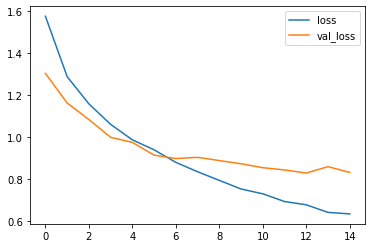

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()



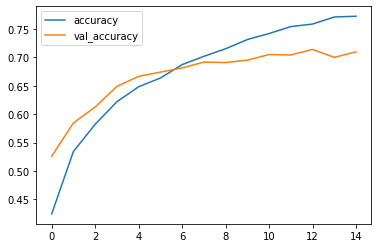

In [11]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8324 - accuracy: 0.7096


[0.832373321056366, 0.7095999717712402]

In [13]:
p_test = model.predict(x_test).argmax(axis=1)
p_test

313/313 [==============================] - 3s 8ms/step


array([3, 8, 8, ..., 5, 1, 7])

Text(69.0, 0.5, 'True value')

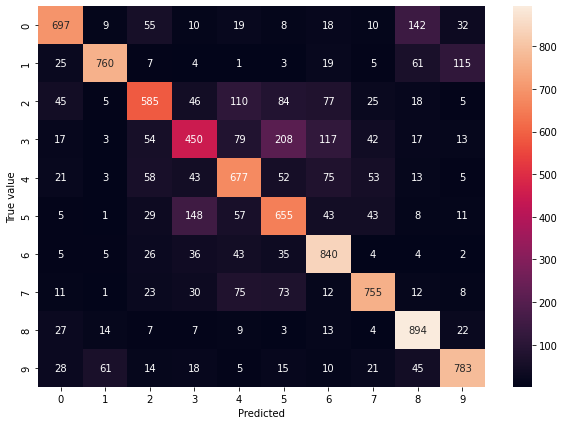

In [14]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=p_test)
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True value')


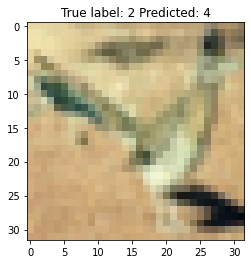

In [17]:
#show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' %(y_test[i], p_test[i]));